In [31]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown

from src.load_data import DataLoaderFactory
from src.plot_data_basic import Plotter, PlotStrategy
from src.plot_data_basic import PlotAverageSessionTimes, PlotNumberOfSessions, PlotUserFrequencyDistribution
from src.plot_data_univariate import PlotCategoricalDistribution, PlotNumericalDistribution
from src.plot_data_bivariate import PlotNumericalVsNumericalScatter, PlotCorrHeatmap, PlotCategoricalVsNumericalBox

from src.eda_tools import plot_bivariate_plots, plot_univariate_plots
from src.plot_tools import add_enriched_datetime_columns, get_daily_session_stats
from src.utils import setup_logger

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

plotter = Plotter(PlotStrategy)

dataset_id = "ACN_JPL"

setup_logger(os.path.join("log",f"{dataset_id.lower()}.log"), level="INFO")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# Load the data
loader = DataLoaderFactory.get_loader(
        dataset_id,
        force_download=False
    )
df_raw: pd.DataFrame = loader.load()
df_original = add_enriched_datetime_columns(df_raw)
display(df_original.head(5))
display(df_original.tail(5))

print("\nData Types and Non-null Counts:")
print(df_original.info())


2025-08-04 15:22:28,500 | INFO | src.load_data | The dataset 'ACN_JPL' already exists in 'c:\Users\OzceylanB\OneDrive\Projects\ev-charge-eda\data\formatted' and will not be re-downloaded.


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
0,EV0,2018-09-05 04:04:13,2018-09-05 12:09:35,9.583,September,Wednesday,2,485.366667,2018-09-05,04:04:13,12:09:35
1,EV1,2018-09-05 04:08:09,2018-09-05 07:09:02,7.114,September,Wednesday,2,180.883333,2018-09-05,04:08:09,07:09:02
2,EV2,2018-09-05 05:35:14,2018-09-05 17:30:12,11.774,September,Wednesday,2,714.966667,2018-09-05,05:35:14,17:30:12
3,EV3,2018-09-05 05:51:31,2018-09-05 15:32:58,6.280,September,Wednesday,2,581.450000,2018-09-05,05:51:31,15:32:58
4,EV4,2018-09-05 06:08:28,2018-09-05 16:32:52,7.022,September,Wednesday,2,624.400000,2018-09-05,06:08:28,16:32:52


,EV_id_x,start_datetime,end_datetime,total_energy,month,day_of_week,day_of_week_enum,duration_minutes,date,start_time,end_time
33633,EV2420,2021-09-13 13:10:59,2021-09-13 14:56:32,10.133,September,Monday,0,105.550000,2021-09-13,13:10:59,14:56:32
33634,EV583,2021-09-13 13:51:51,2021-09-13 20:17:55,23.863,September,Monday,0,386.066667,2021-09-13,13:51:51,20:17:55
33635,EV2051,2021-09-13 14:37:59,2021-09-13 17:12:49,8.547,September,Monday,0,154.833333,2021-09-13,14:37:59,17:12:49
33636,EV2298,2021-09-13 18:08:16,2021-09-13 18:31:24,1.253,September,Monday,0,23.133333,2021-09-13,18:08:16,18:31:24
33637,EV673,2021-09-13 22:43:39,2021-09-14 07:46:28,53.937,September,Monday,0,542.816667,2021-09-13,22:43:39,07:46:28



Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33638 entries, 0 to 33637
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EV_id_x           33638 non-null  object        
 1   start_datetime    33638 non-null  datetime64[ns]
 2   end_datetime      33638 non-null  datetime64[ns]
 3   total_energy      33638 non-null  float64       
 4   month             33638 non-null  object        
 5   day_of_week       33638 non-null  object        
 6   day_of_week_enum  33638 non-null  int32         
 7   duration_minutes  33638 non-null  float64       
 8   date              33638 non-null  object        
 9   start_time        33638 non-null  object        
 10  end_time          33638 non-null  object        
dtypes: datetime64[ns](2), float64(2), int32(1), object(6)
memory usage: 2.7+ MB
None


### EV Arrival Patterns

**Number of EV Arrivals per Month**  
   This bar chart displays the monthly counts of EV arrivals across the original dataset.  
   - Activity is highest between **late-2018 and early 2020**, reaching a peak of around **1,500 sessions per month**.  
   - There is a significant **drop in arrivals after February 2020**, which coincides with the start of the COVID-19 pandemic, followed by a slow recovery into 2021.  

These visualizations provide insight into the temporal patterns of EV charging usage, and pandemic-related decline in activity.


2025-08-04 15:22:28,770 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:28,772 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


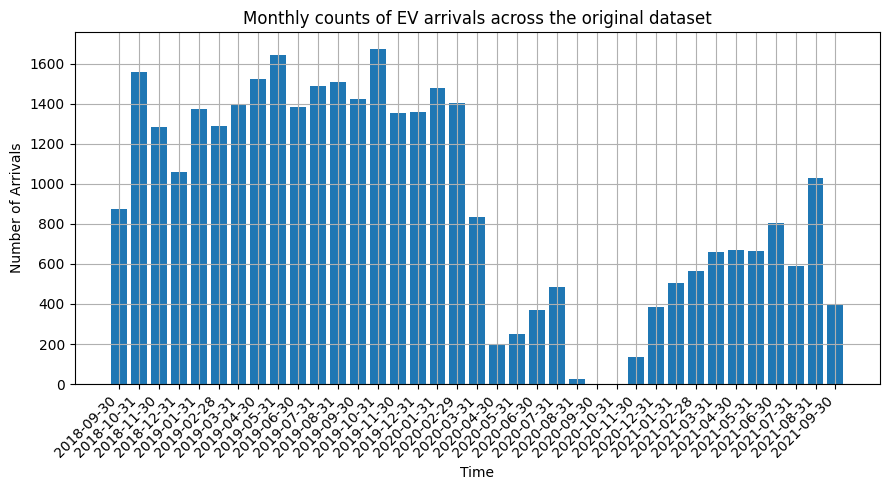

In [33]:
fig, ax = plt.subplots(figsize=(9, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_original, ax=ax)
ax.set_title("Monthly counts of EV arrivals across the original dataset")
plt.show()

### Data Cleaning Steps

The dataset initially contained **33.638 charging sessions**, spanning from **2018-09-05** to **2021-09-13**.

1. **Remove sessions after February 2020**  
   To exclude the period impacted by the COVID-19 pandemic, all charging sessions that occurred **after February 2020** will be removed.  
   *This step removed approximately **29.6%** of the data.*

2. **Remove weekend sessions**  
   There are very few sessions on weekends, all charging sessions **on weekends** will be removed.  
   *This step removes approximately **2.44%** of the remaining sessions.*

After these cleaning steps, **23,079  (68.6%) sessions** remain for analysis.



In [34]:
df = df_original
total_sessions = df.shape[0]

# Count sessions after the cutoff_date (2020-02-01)
cutoff_date = pd.to_datetime("2020-02-01")
after_cutoff_date = df["start_datetime"] >= cutoff_date
portion_after_cutoff_date = 100 * after_cutoff_date.sum() / total_sessions

display(Markdown(f"""
Total number of sessions: {total_sessions}.<br>
Remove the sessions occurred **after Feb 2020** (COVID-19 pandemic) -> **{after_cutoff_date.sum()} sessions ({portion_after_cutoff_date:.1f}%)**.
"""))

df_v1 = df[(df["start_datetime"] < cutoff_date)].copy()



Total number of sessions: 33638.<br>
Remove the sessions occurred **after Feb 2020** (COVID-19 pandemic) -> **9971 sessions (29.6%)**.


In [35]:
df = df_v1
total_sessions = df.shape[0]

sessions_on_weekend = df["day_of_week_enum"] >= 5
portion_sessions_on_weekend = 100 * sessions_on_weekend.sum() / total_sessions

display(Markdown(f"""
Total number of remaining sessions: {total_sessions}.<br>
The number of sessions occurred **on weekends**: **{sessions_on_weekend.sum()} sessions ({portion_sessions_on_weekend:.2f}%)**.
"""))

df_v2 = df[(df["day_of_week_enum"] < 5)].copy()


Total number of remaining sessions: 23667.<br>
The number of sessions occurred **on weekends**: **577 sessions (2.44%)**.


In [36]:
df_cleaned = df_v2
total_sessions_original = df_original.shape[0]
total_sessions_cleaned = df_cleaned.shape[0]
display(Markdown(f"""
Total number of remaining sessions: {total_sessions_cleaned} ({100*total_sessions_cleaned/total_sessions_original:.1f}%).
"""))


Total number of remaining sessions: 23090 (68.6%).


2025-08-04 15:22:29,255 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:29,262 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


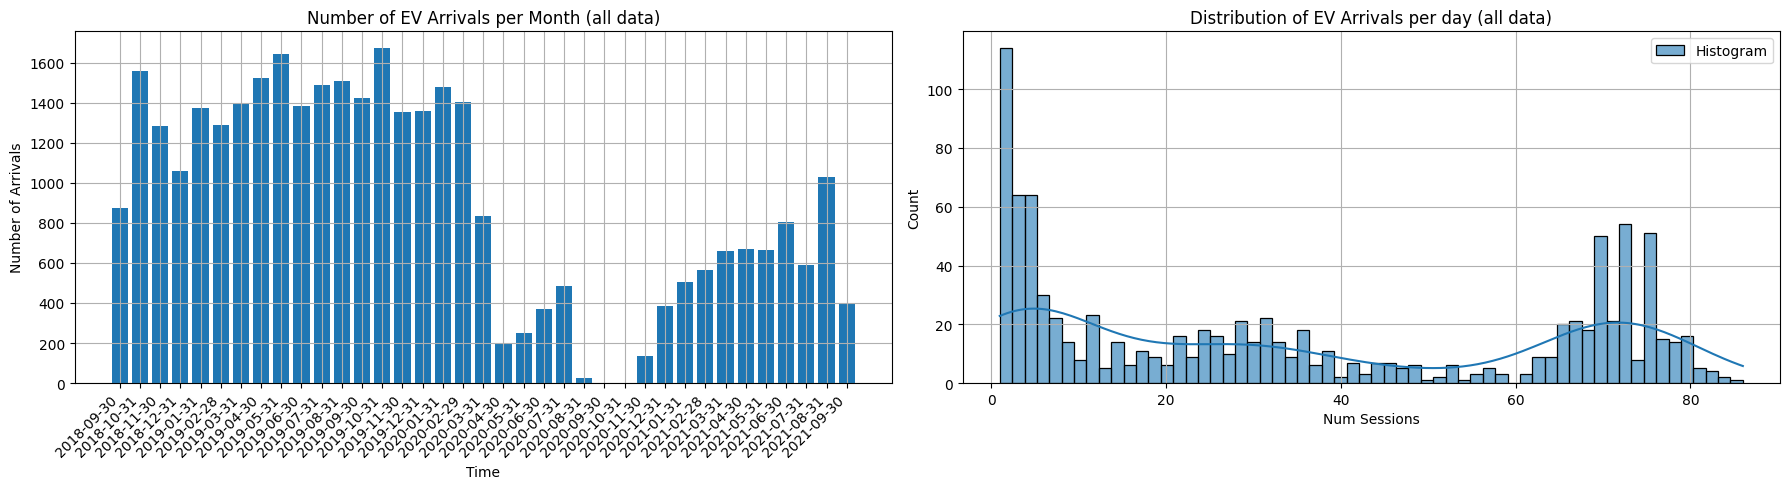

2025-08-04 15:22:30,069 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:30,071 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


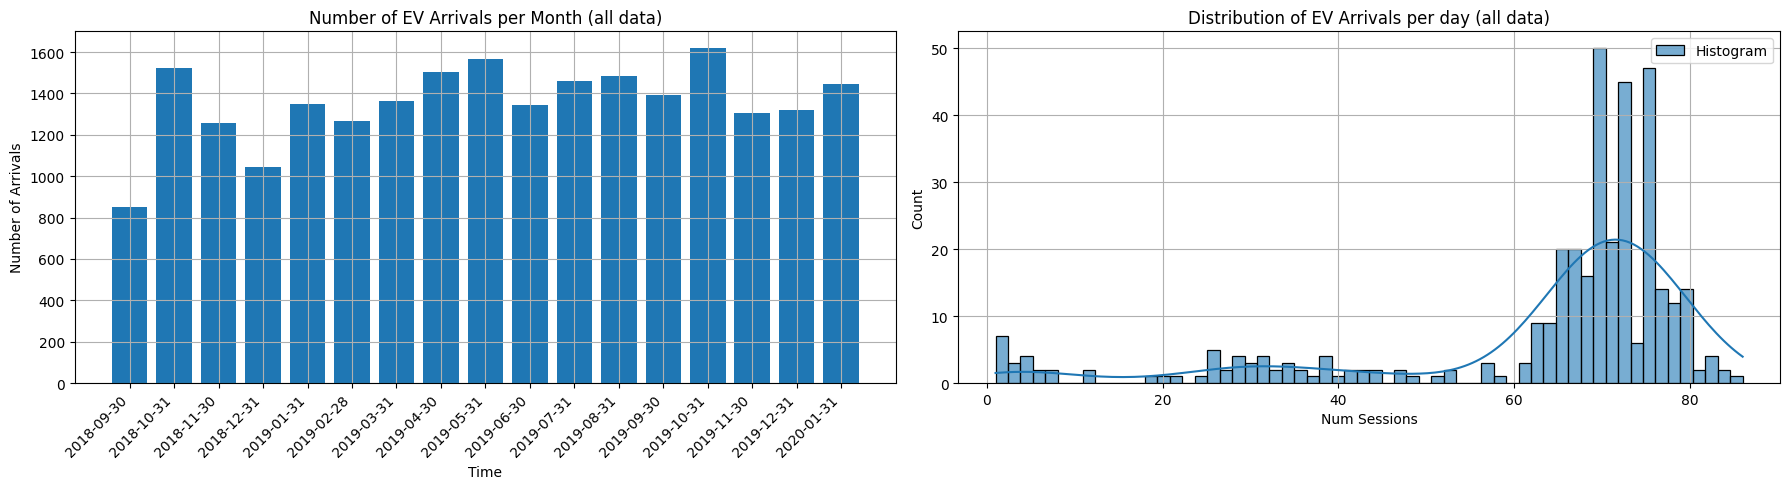

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_original, ax= axs[0])
fig.axes[0].set_title("Number of EV Arrivals per Month (all data)")

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(get_daily_session_stats(df_original), column="num_sessions", bins=60, ax=axs[1])
fig.axes[1].set_title("Distribution of EV Arrivals per day (all data)")
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
plotter.set_strategy(PlotNumberOfSessions(frequency='ME', max_xticks= 20))
fig = plotter.plot(df_cleaned, ax= axs[0])
fig.axes[0].set_title("Number of EV Arrivals per Month (all data)")

plotter.set_strategy(PlotNumericalDistribution(kde=True))
plotter.plot(get_daily_session_stats(df_cleaned), column="num_sessions", bins=60, ax=axs[1])
fig.axes[1].set_title("Distribution of EV Arrivals per day (all data)")
plt.show()

### EV Arrival Patterns After Data Cleaning

The figure above compares the distribution of EV charging sessions **before and after applying data-cleaning steps** (removing post–February 2020 data and sessions on weekdays):

1. **Number of EV Arrivals per Month (left)**  
   - After cleaning, the dataset primarily covers activity from **mid-2018 through early 2020**.  
   - Monthly arrivals are **stable** compared to the raw dataset, generally around **1,400 per month**. 
   - The large drop in arrivals after early 2020 (observed in the raw data) is no longer present, as those months were excluded.  

2. **Distribution of EV Arrivals per Day (right)**  
   - Daily arrival counts are concentrated **between 60–80 arrivals per day**, showing a consistent usage pattern.  
   - A small number of days exhibit **lower activity (<60 sessions)**, suggesting occasional events.  

In summary, these patterns suggest that EV usage was steady during the observed period, both at a monthly and daily scale, with only minor and infrequent anomalies. This stability makes the dataset well-suited for analyzing typical EV charging behaviors.


Unique users: 2195
Users with at least 20 sessions: 216 (9.8%) of the users account for 87.1% of all sessions.
Users with at least 10 sessions: 261 (11.9%) of the users account for 89.8% of all sessions.
Users with at least 5 sessions: 316 (14.4%) of the users account for 91.4% of all sessions.
Users with at least 3 sessions: 353 (16.1%) of the users account for 91.9% of all sessions.
Users with only one sessions: 1822 (83.0%) of the users account for 7.9% of all sessions.


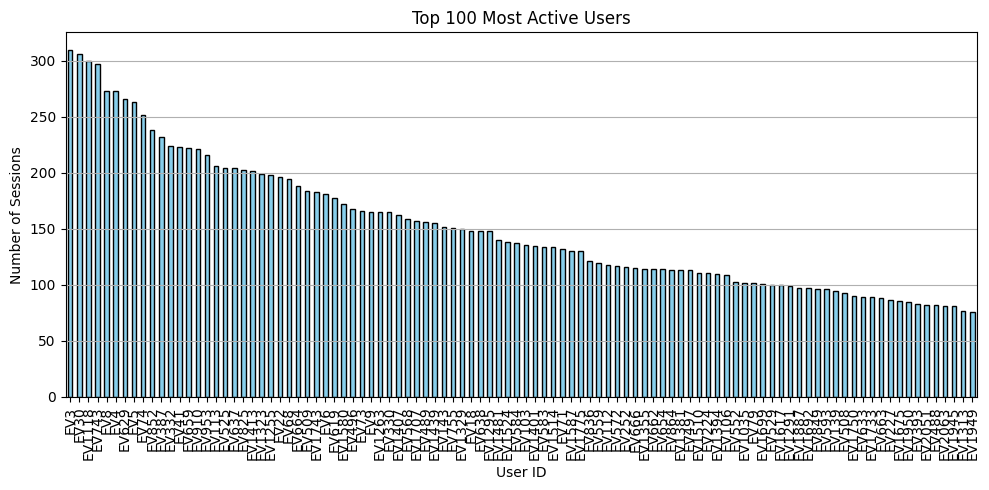

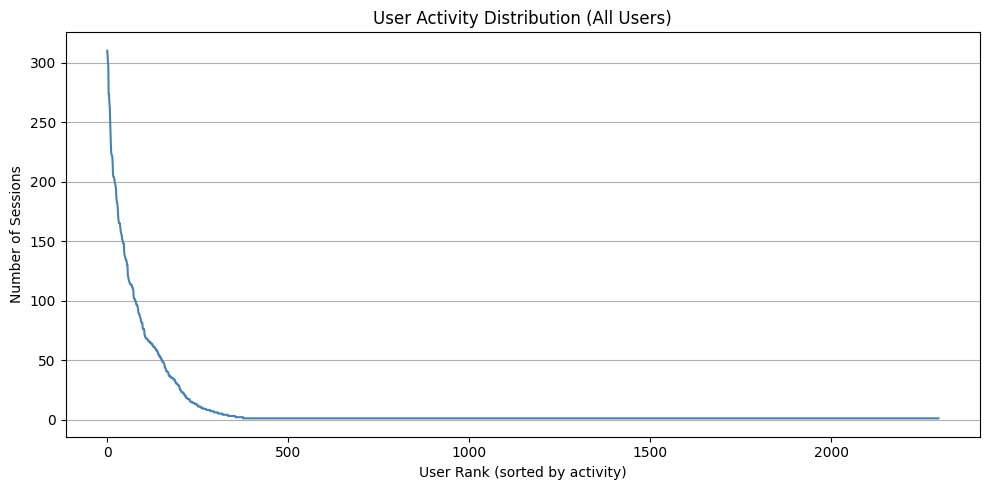

In [38]:
# Number of unique users
unique_users = df_cleaned['EV_id_x'].nunique()

# Session counts per user
sessions_per_user = df_cleaned['EV_id_x'].value_counts()

print(f"Unique users: {unique_users}")

for x in [20, 10, 5, 3]: 
    mask = sessions_per_user >= x
    more_than_x = mask.sum()
    percentage_more_than_x = (more_than_x / unique_users) * 100 
    print(f"Users with at least {x} sessions: {more_than_x} ({percentage_more_than_x:.1f}%) of the users account for {100*sessions_per_user.loc[mask].sum()/sessions_per_user.sum():.1f}% of all sessions.")

mask = sessions_per_user == 1
only_one = mask.sum()
percentage_only_one = (only_one / unique_users) * 100
print(f"Users with only one sessions: {only_one} ({percentage_only_one:.1f}%) of the users account for {100*sessions_per_user.loc[mask].sum()/sessions_per_user.sum():.1f}% of all sessions.")

plotter.set_strategy(PlotUserFrequencyDistribution())
fig, _ = plotter.plot(df_v1, top_n = 100)
fig, _ = plotter.plot(df_v1,top_n=-1)


### User Activity Distribution (All Users)

The figure above shows the distribution of **all 3,374 EV users**, ranked by their number of charging sessions:

- **9.9% of users** (≥20 sessions) account for **87.1% of sessions**.
- **11.9% of users** (≥10 sessions) account for **89.8% of sessions**.
- **14.4% of users** (≥10 sessions) account for **91.4% of sessions**.
- **83% of users** are one-time users, yet they contribute **only 7.9% of sessions**.

This indicates that a relatively small group of highly engaged users drives nearly all the activity. As a result, **user-level analysis in this dataset is meaningful**, since user behavior is consistent and recurring among the more engaged portion of the user base.

### Exploring Dataset Distributions

In the following sections, we present key **categorical** and **numerical** distributions related to the dataset.  
These visualizations help uncover patterns in usage behavior, session characteristics, and other important features of the EV charging data.

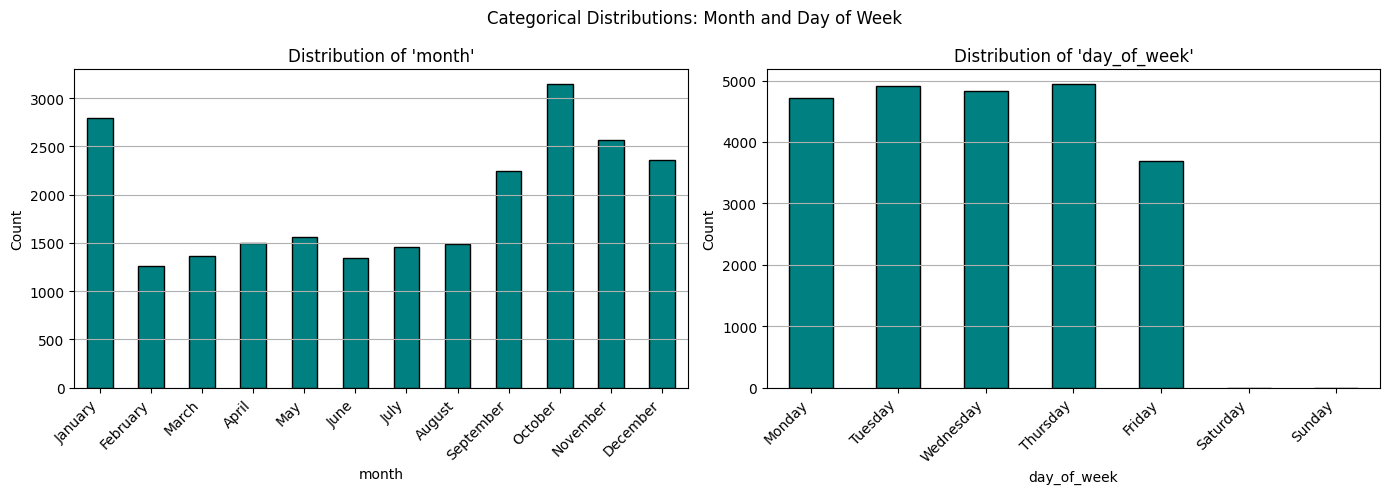

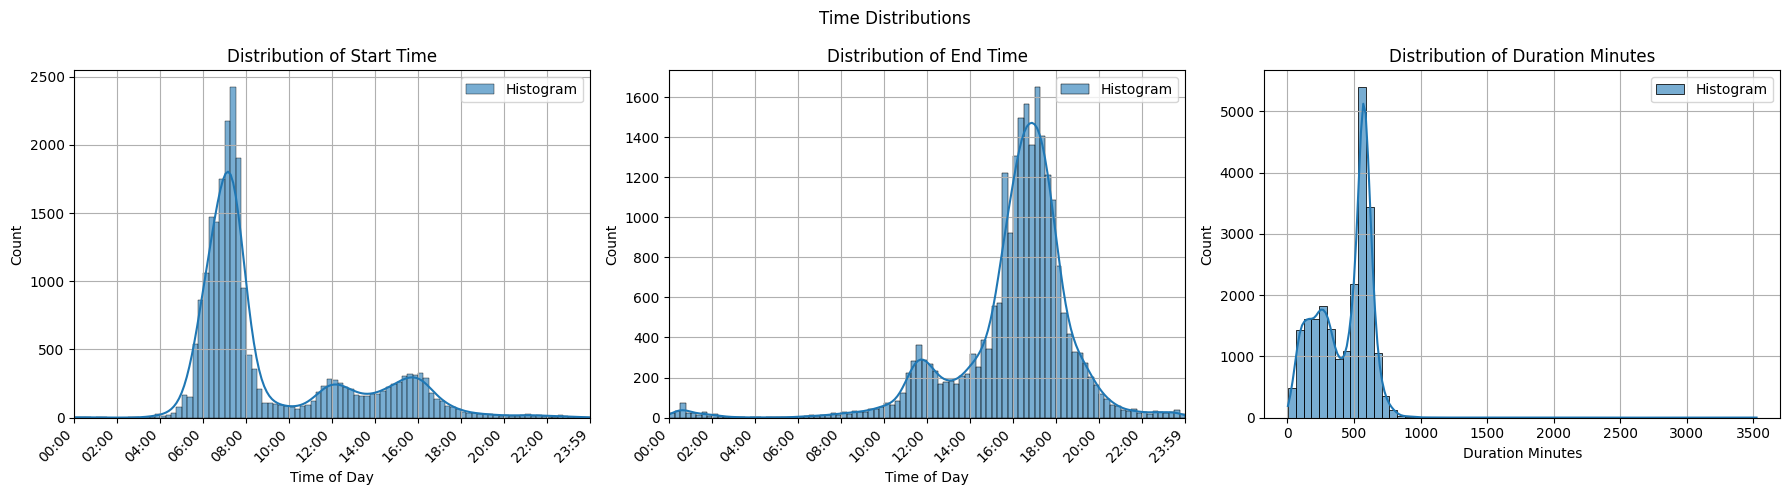

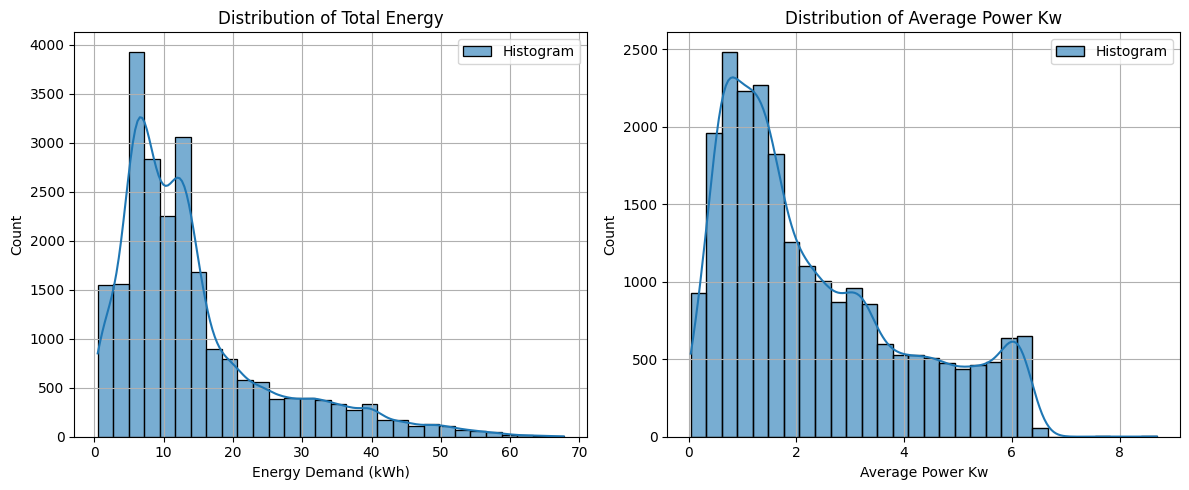

In [39]:
plot_univariate_plots(plotter, df_cleaned)

### Bivariate Analysis

Next, we explore **bivariate relationships** within the dataset to better understand how variables interact with each other.  
This includes visualizations such as **correlation heatmaps**, and **2D histograms** to examine joint distributions of key variables.  

**Note:** Some EVs **stay connected overnight**, which leads to patterns that may initially appear unusual. However, these behaviors are valid.


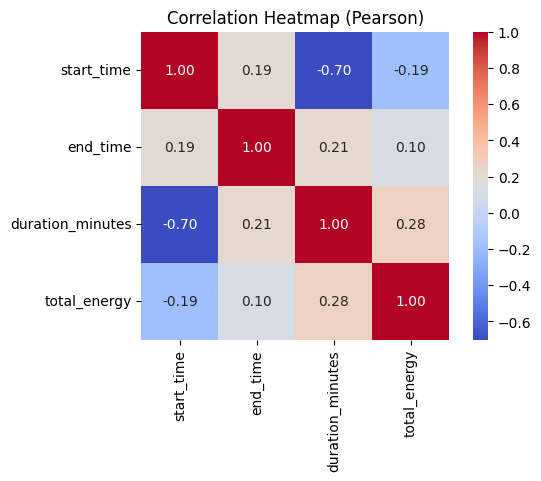

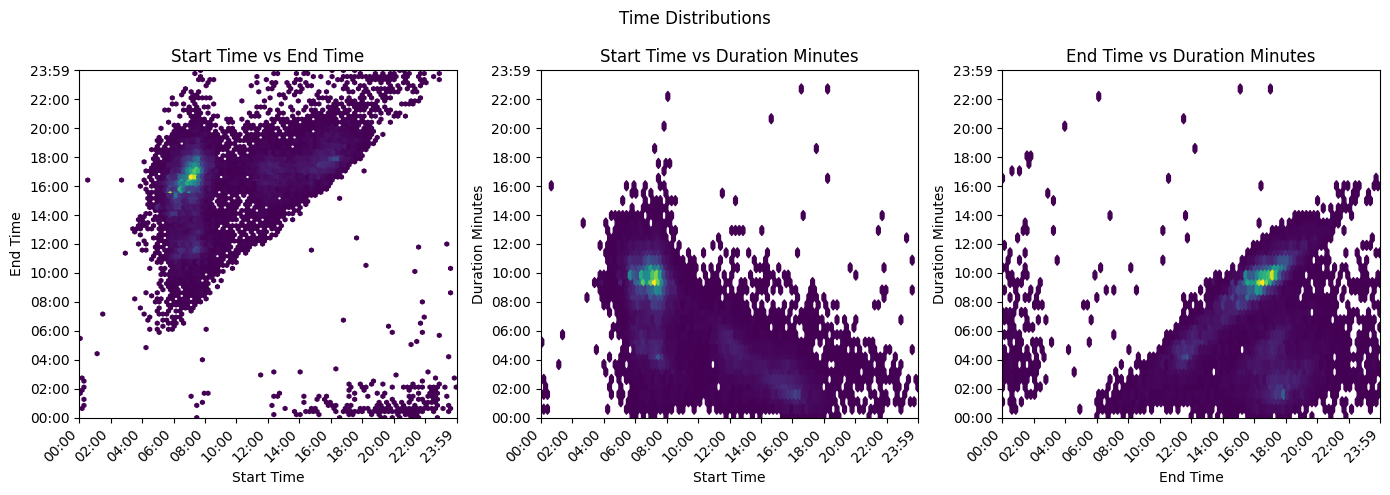

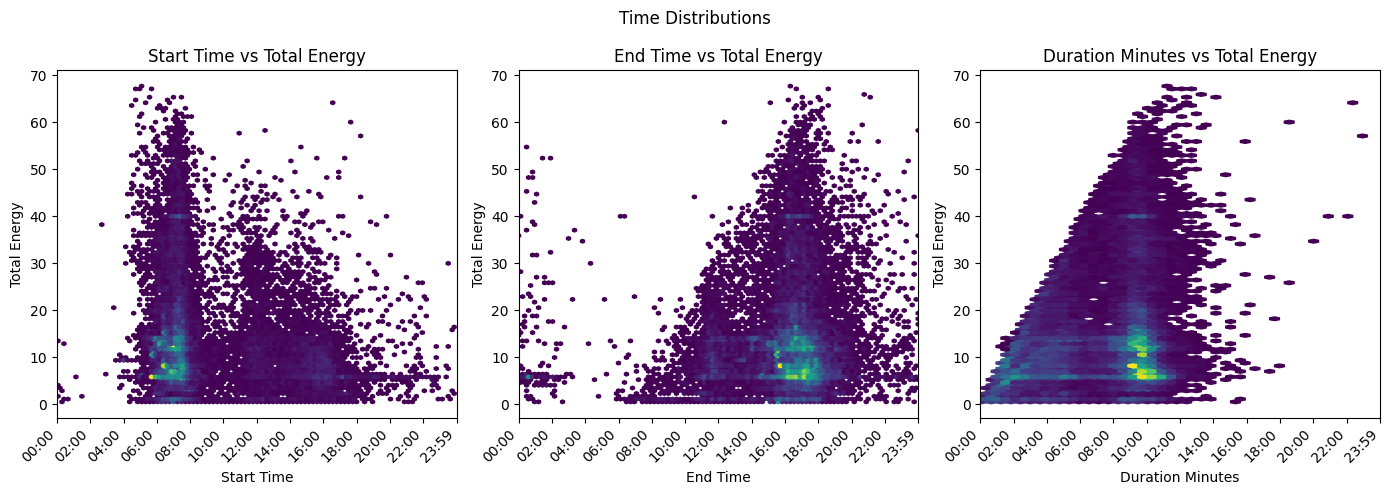

2025-08-04 15:22:33,382 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:33,400 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:33,514 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:33,531 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:33,

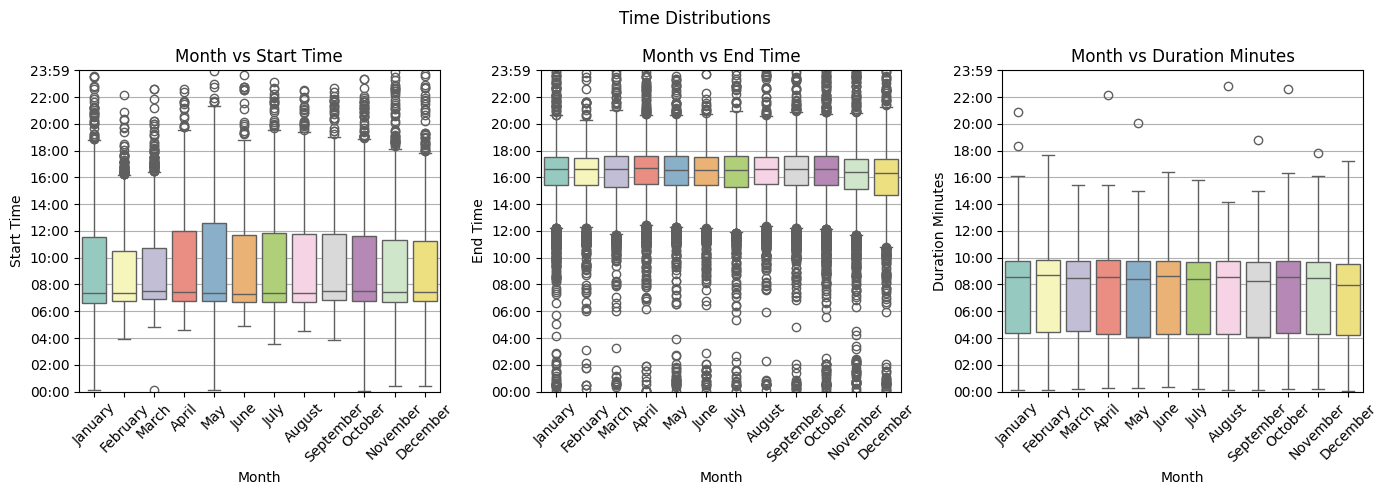

2025-08-04 15:22:34,079 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:34,093 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:34,157 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:34,173 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:34,

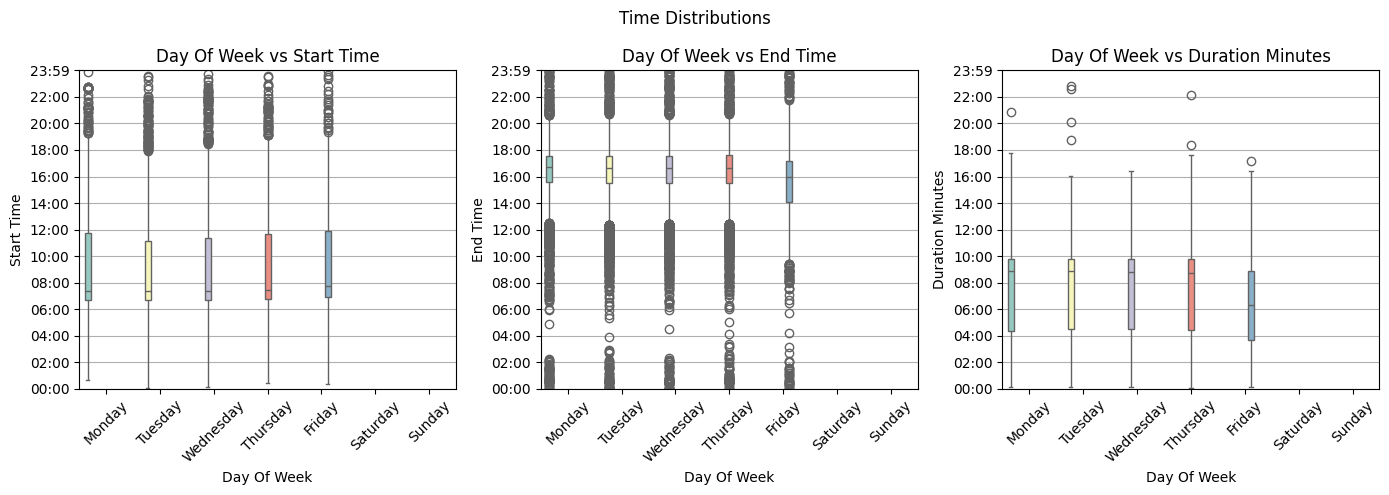

In [40]:
plot_bivariate_plots(plotter, df_cleaned)

### Bivariate Analysis (exluding sessions that stay connected overnight)


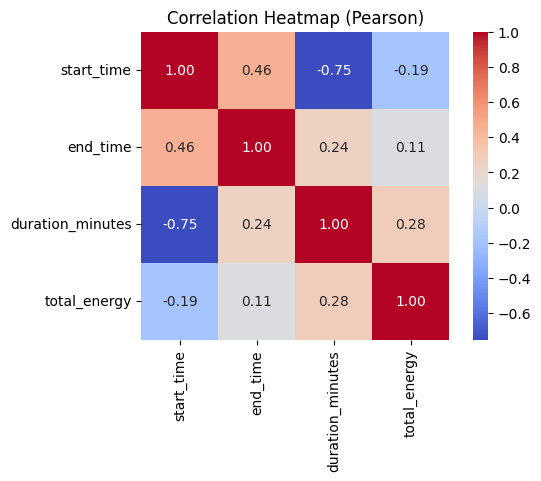

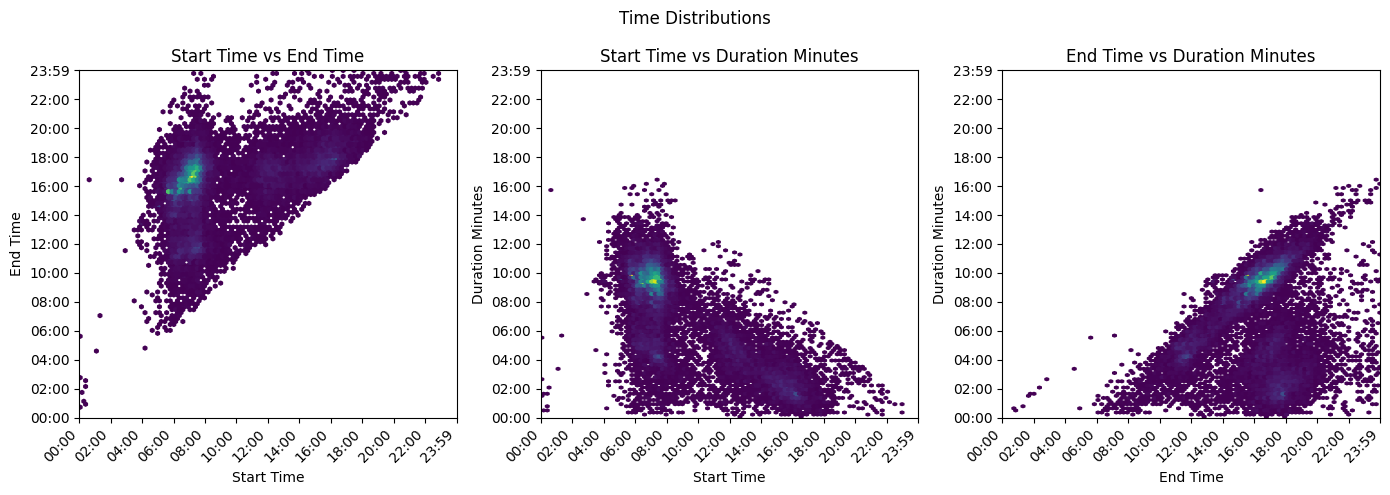

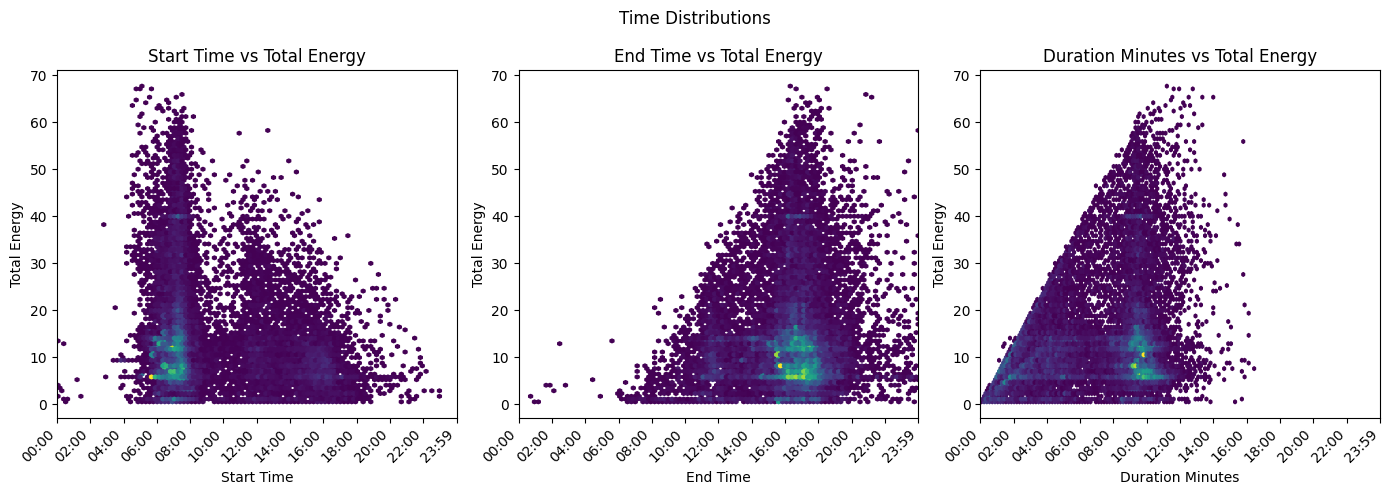

2025-08-04 15:22:35,329 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:35,343 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:35,444 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:35,454 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:35,

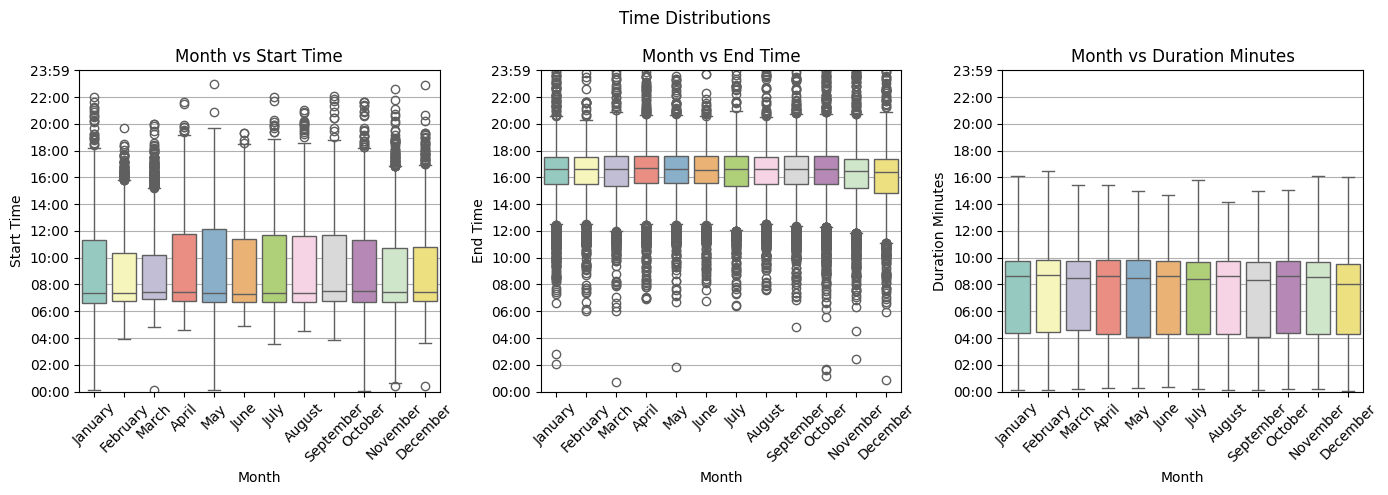

2025-08-04 15:22:35,987 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:36,001 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:36,060 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:36,070 | INFO | matplotlib.category | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-08-04 15:22:36,

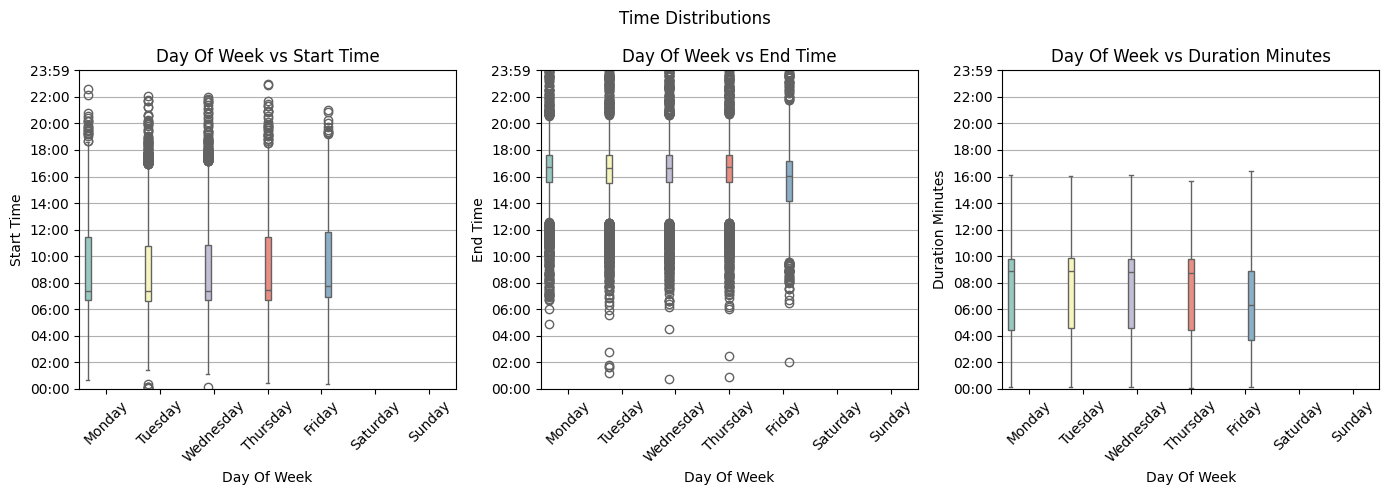

In [41]:
df_cleaned["is_overnight"] = df_cleaned["start_datetime"].dt.date != df_cleaned["end_datetime"].dt.date
df_cleaned_no_overnight = df_cleaned.loc[~df_cleaned["is_overnight"]].copy()
plot_bivariate_plots(plotter,df_cleaned_no_overnight)